# SLSim vs. SLACS Dinos lenses
Notebook by: Sofia Castillo and Mia LaMontagne

In this notebook, we compare SLSim generated lens parameters against real observed SLACS Dinos lenses, visualing these comparisons as corner plots (Sofia Castillo) as well as 3D scatter plots for further anaylsis (Mia LaMontagne). 

In [80]:
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy.units import Quantity
from slsim.lens_pop import LensPop
from slsim.Plots.lens_plots import LensingPlots
import numpy as np
import corner
import slsim.Pipelines as pipelines
import slsim.Sources as sources
import slsim.Deflectors as deflectors
import slsim
from astropy import units as u
from astropy.constants import c
from astropy.cosmology import FlatLambdaCDM
from lenstronomy.Cosmo.lens_cosmo import LensCosmo

In [2]:
import warnings

warnings.filterwarnings("ignore")

## SLSim Vs. SLACS Dinos Lenses- Corner Plot (Sofia Castillo) 

In [83]:
# define a cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Large sky area for deflectors (lens galaxies)
sky_area_lens = Quantity(0.5, unit="deg2")

# Smaller sky area for sources (source galaxies)
sky_area_source = Quantity(0.5, unit="deg2")

sky_area_pop = Quantity(20, unit="deg2")

# define limits in the intrinsic deflector and source population (in addition to the skypy config
# file)
kwargs_deflector_cut = {"band": "g", "band_max": 24, "z_min": 0.01, "z_max": 2}
kwargs_source_cut = {"band": "g", "band_max": 28, "z_min": 0.1, "z_max": 5.0}

In [84]:
# Use large sky area here for deflector population generation
galaxy_simulation_pipeline = pipelines.SkyPyPipeline(
    skypy_config=None, sky_area=sky_area_lens, filters=None, cosmo=cosmo
)

In [85]:
lens_galaxies = deflectors.AllLensGalaxies(
    red_galaxy_list=galaxy_simulation_pipeline.red_galaxies,
    blue_galaxy_list=galaxy_simulation_pipeline.blue_galaxies,
    kwargs_cut=kwargs_deflector_cut,
    kwargs_mass2light=None,
    cosmo=cosmo,
    sky_area=sky_area_lens,  # use large area here
)

In [90]:
# Initiate source population class.
source_galaxies = sources.Galaxies(
    galaxy_list=galaxy_simulation_pipeline.blue_galaxies,
    kwargs_cut=kwargs_source_cut,
    cosmo=cosmo,
    sky_area=sky_area_source,  #  use smaller area here
    catalog_type="skypy",
)

In [7]:
gg_lens_pop = LensPop(
    deflector_population=lens_galaxies,
    source_population=source_galaxies,
    cosmo=cosmo,
    sky_area=sky_area_pop,  # This sky_area is what’s used for simulated solid angle
)

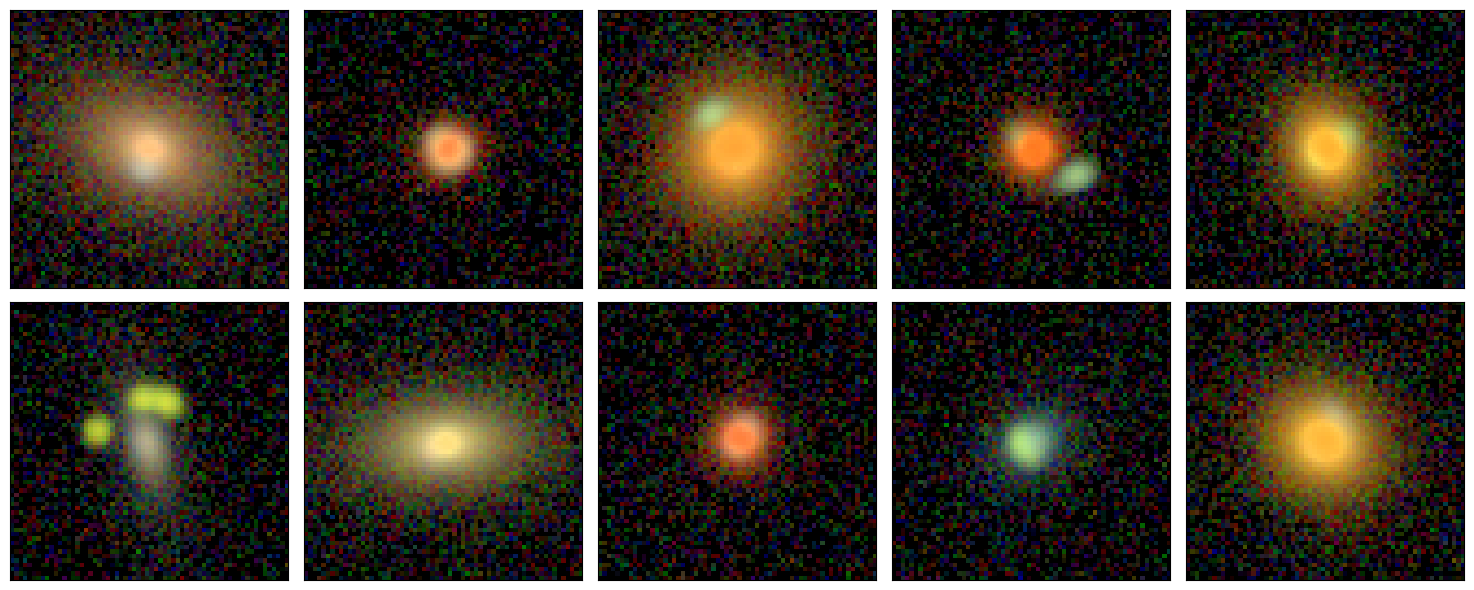

In [8]:
# make some cuts in the image separations and limited magnitudes of the arc
kwargs_lens_cut_plot = {
    "min_image_separation": 0.8,
    "max_image_separation": 10,
    "mag_arc_limit": {"g": 23, "r": 23, "i": 23},
}


gg_plot = LensingPlots(gg_lens_pop, num_pix=64, coadd_years=10)

# generate montage indicating which bands are used for the rgb color image
fig, axes = gg_plot.plot_montage(
    rgb_band_list=["i", "r", "g"],
    add_noise=True,
    n_horizont=5,
    n_vertical=2,
    kwargs_lens_cut=kwargs_lens_cut_plot,
)
plt.show()

In [9]:
# specifying cuts of the population
kwargs_lens_cuts = {"mag_arc_limit": {"g": 28}}
# drawing population
gg_lens_population = gg_lens_pop.draw_population(kwargs_lens_cuts=kwargs_lens_cuts)

In [10]:
# Importing Slacs Data
import pandas as pd

In [11]:
slacs_data = pd.read_csv("dinos1_lens_data.csv")

In [12]:
slacs_data.head()

Lens system Survey   theta_E sig_theta_E_up sig_theta_E_low  gamma  \
0             NaN    NaN  (arcsec)       (arcsec)        (arcsec)    NaN   
1  SDSSJ0008-0004  SLACS     1.225          0.008           0.009   1.75   
2  SDSSJ0029-0055  SLACS     0.945          0.003           0.003   2.69   
3  SDSSJ0037-0942  SLACS     1.476          0.010           0.007   2.38   
4  SDSSJ0252+0039  SLACS     1.028          0.001           0.001   1.55   

   sig_gamma_up  sig_gamma_low  sig_gamma_sys   q_m  ...  sig_R_eff_low  \
0           NaN            NaN            NaN   NaN  ...       (arcsec)   
1          0.14           0.12           0.33  0.60  ...          0.025   
2          0.04           0.05           0.25  0.66  ...          0.005   
3          0.02           0.02           0.11  0.73  ...          0.047   
4          0.04           0.03           0.12  0.89  ...          0.005   

   z_lens z_source sigma_los sig_sigma_los  slit_shape  slit radius  \
0     NaN      NaN   (km /s)       (km /s)         NaN     (arcsec)   
1    0.44     1.19       227            27    Circular          1.5   
2    0.23     0.93       215            14    Circular          1.5   
3    0.20     0.63       264             7    Circular          1.5   
4    0.28     0.98       193             9    Circular          1.5   

   slit_width slit_length    seeing  
0    (arcsec)    (arcsec)  (arcsec)  
1          --          --       1.4  
2          --          --       1.4  
3          --          --       1.4  
4          --          --       1.4  

[5 rows x 39 columns]

In [13]:
slacs_data = pd.read_csv("dinos1_lens_data.csv")

In [14]:
print(slacs_data.columns.tolist())

['Lens system', 'Survey', 'theta_E', 'sig_theta_E_up', 'sig_theta_E_low', 'gamma', 'sig_gamma_up', 'sig_gamma_low', 'sig_gamma_sys', 'q_m', 'sig_q_m_up', 'sig_q_m_low', 'phi_m', 'sig_phi_m_up', 'sig_phi_m_low', 'gamma_shear', 'sig_gamma_shear_up', 'sig_gamma_shear_low', 'phi_shear', 'sig_phi_shear_hi', 'sig_phi_shear_low', 'q_L', 'sig_q_L_up', 'sig_q_L_low', 'phi_L', 'sig_phi_L_up', 'sig_phi_L_low', 'R_eff', 'sig_R_eff_up', 'sig_R_eff_low', 'z_lens', 'z_source', 'sigma_los', 'sig_sigma_los', 'slit_shape', 'slit radius', 'slit_width', 'slit_length', 'seeing']


In [18]:
# Coerce all relevant columns to numeric
cols = [
    "sigma_los",
    "theta_E",
    "gamma_shear",
    "z_lens",
    "z_source",
    "R_eff",
    "q_L",
    "q_m",
    "phi_L",
    "phi_m",
]

for col in cols:
    slacs_data[col] = pd.to_numeric(slacs_data[col], errors="coerce")

# Now safely create Δphi
slacs_data["delta_phi"] = slacs_data["phi_L"] - slacs_data["phi_m"]

In [20]:
import numpy as np


def ellipticity_to_q_pa(e1, e2):
    """Convert ellipticity components (e1, e2) to axis ratio q and position angle phi"""
    e = np.hypot(e1, e2)
    q = (1 - e) / (1 + e)
    phi = 0.5 * np.degrees(np.arctan2(e2, e1))
    return q, phi

In [22]:
lens_samples = []

for gg_lens in gg_lens_population:
    vel_disp = gg_lens.deflector_velocity_dispersion()
    theta_e = gg_lens.einstein_radius[0]
    shear = gg_lens.external_shear
    zl = gg_lens.deflector_redshift
    zs = gg_lens.source_redshift_list[0]
    r_eff = gg_lens.deflector.angular_size_light
    e1_l, e2_l = gg_lens.deflector.light_ellipticity
    q_light, phi_l = ellipticity_to_q_pa(e1_l, e2_l)

    e1_m, e2_m = gg_lens.deflector.mass_ellipticity
    q_mass, phi_m = ellipticity_to_q_pa(e1_m, e2_m)

    delta_phi = (phi_m - phi_l + 180) % 360 - 180

    lens_samples.append(
        [
            vel_disp,
            theta_e,
            shear,
            zl,
            zs,
            r_eff,
            q_light,
            q_mass,
            phi_l,
            phi_m,
            delta_phi,
        ]
    )

In [23]:
# Fix dtype issues
slacs_data["phi_L"] = pd.to_numeric(slacs_data["phi_L"], errors="coerce")
slacs_data["phi_m"] = pd.to_numeric(slacs_data["phi_m"], errors="coerce")

# Now construct dinos1_samples
dinos1_samples = np.array(
    [
        slacs_data["sigma_los"],
        slacs_data["theta_E"],
        slacs_data["gamma_shear"],
        slacs_data["z_lens"],
        slacs_data["z_source"],
        slacs_data["R_eff"],
        slacs_data["q_L"],
        slacs_data["q_m"],
        slacs_data["phi_L"],
        slacs_data["phi_m"],
        slacs_data["phi_L"] - slacs_data["phi_m"],
    ]
).T

In [24]:
print("lens_samples shape:", np.array(lens_samples).shape)
print("dinos1_samples shape:", np.array(dinos1_samples).shape)

lens_samples shape: (3808, 11)
dinos1_samples shape: (78, 11)


In [25]:
# Remove NaNs from both samples to prevent corner crashes
lens_samples = np.array(lens_samples, dtype=float)
dinos1_samples = np.array(dinos1_samples, dtype=float)

# Drop rows with any NaNs
lens_samples = lens_samples[~np.isnan(lens_samples).any(axis=1)]
dinos1_samples = dinos1_samples[~np.isnan(dinos1_samples).any(axis=1)]


# Optional: also remove rows with no variation (identical values)
def has_range(row):
    return np.ptp(row) > 0  # ptp = max - min


lens_samples = np.array([row for row in lens_samples if has_range(row)])
dinos1_samples = np.array([row for row in dinos1_samples if has_range(row)])

Final lens sample shape: (3808, 11)
Final dinos1 sample shape: (68, 11)


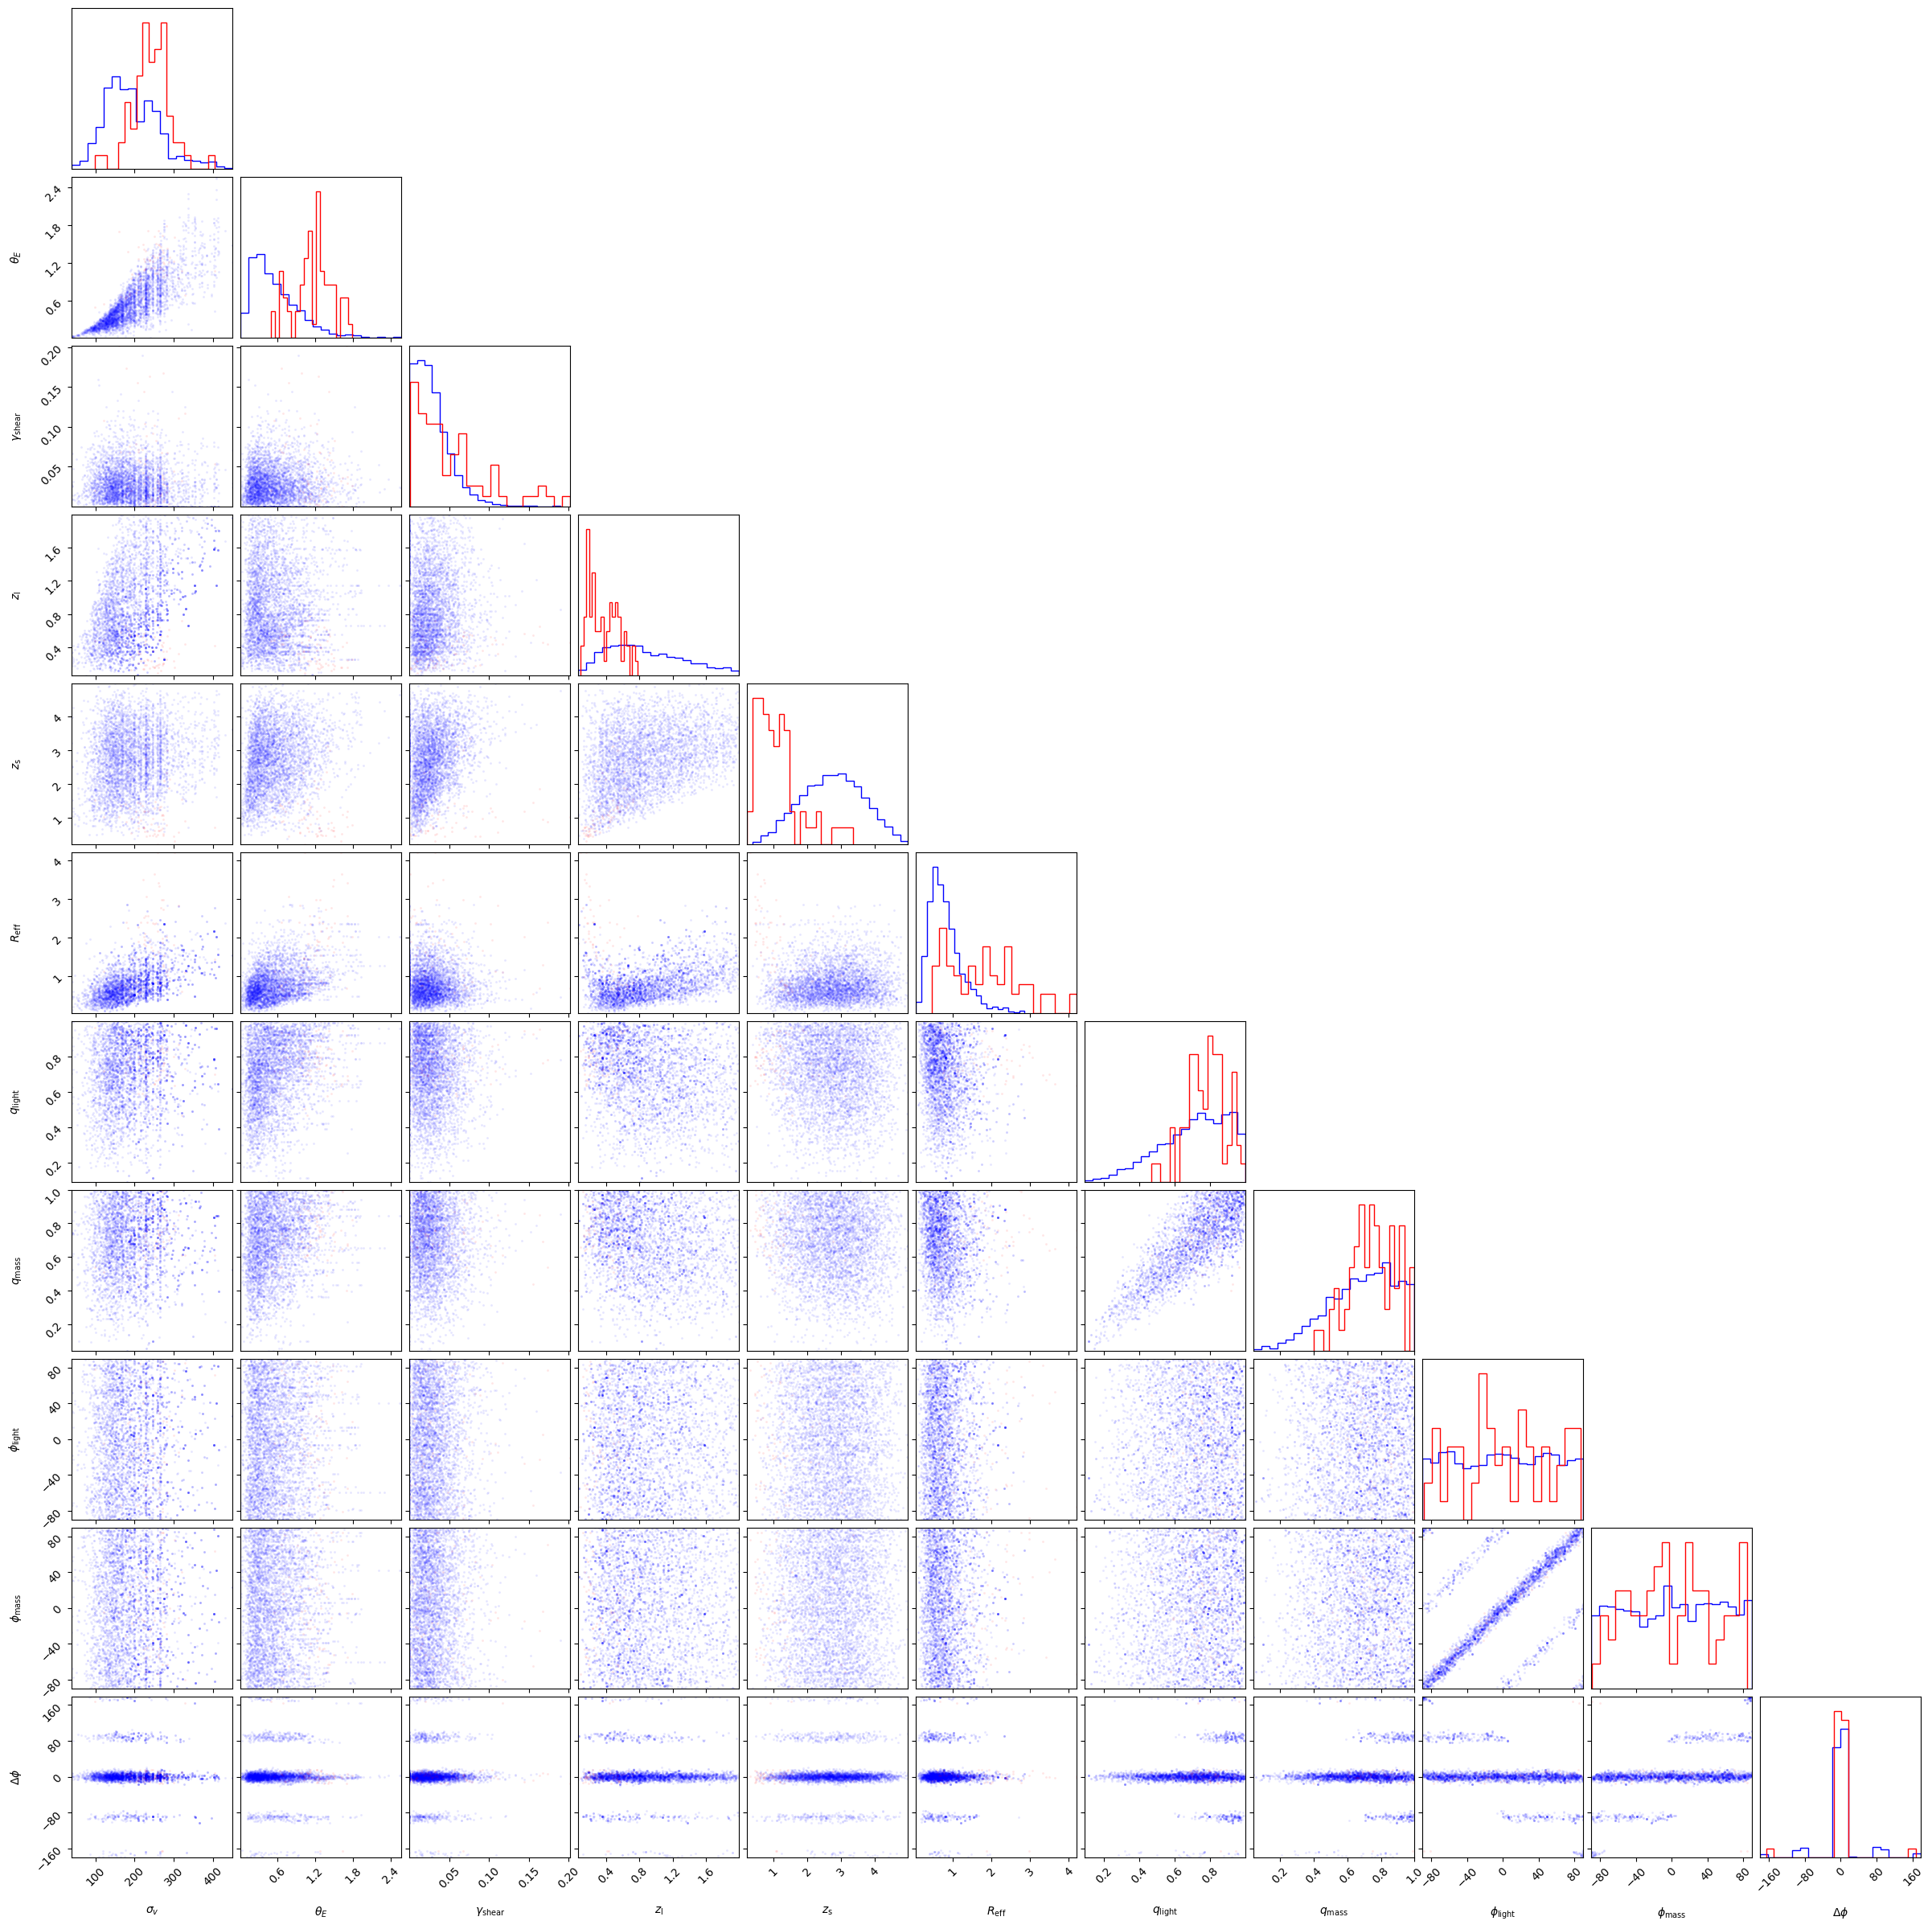

In [26]:
# --- Ensure samples are numeric and remove rows with NaNs ---
lens_samples = np.array(lens_samples, dtype=float)

# Convert slacs_data columns to numeric again just to be safe
cols = [
    "sigma_los",
    "theta_E",
    "gamma_shear",
    "z_lens",
    "z_source",
    "R_eff",
    "q_L",
    "q_m",
    "phi_L",
    "phi_m",
]

for col in cols:
    slacs_data[col] = pd.to_numeric(slacs_data[col], errors="coerce")

# Recompute delta_phi
slacs_data["delta_phi"] = slacs_data["phi_L"] - slacs_data["phi_m"]

# Build dinos1_samples
dinos1_samples = np.array(
    [
        slacs_data["sigma_los"],
        slacs_data["theta_E"],
        slacs_data["gamma_shear"],
        slacs_data["z_lens"],
        slacs_data["z_source"],
        slacs_data["R_eff"],
        slacs_data["q_L"],
        slacs_data["q_m"],
        slacs_data["phi_L"],
        slacs_data["phi_m"],
        slacs_data["delta_phi"],
    ]
).T

# Remove NaNs from both samples
lens_samples = lens_samples[~np.isnan(lens_samples).any(axis=1)]
dinos1_samples = dinos1_samples[~np.isnan(dinos1_samples).any(axis=1)]

# --- Final check ---
print("Final lens sample shape:", lens_samples.shape)
print("Final dinos1 sample shape:", dinos1_samples.shape)

# --- Define labels ---
labels = [
    r"$\sigma_v$",
    r"$\theta_E$",
    r"$\gamma_{\rm shear}$",
    r"$z_{\rm l}$",
    r"$z_{\rm s}$",
    r"$R_{\rm eff}$",
    r"$q_{\rm light}$",
    r"$q_{\rm mass}$",
    r"$\phi_{\rm light}$",
    r"$\phi_{\rm mass}$",
    r"$\Delta \phi$",
]

# --- Generate corner plot ---
import matplotlib.pyplot as plt
import corner

fig = corner.corner(
    lens_samples,
    labels=labels,
    color="blue",
    plot_datapoints=True,
    plot_density=False,
    fill_contours=False,
    plot_contours=False,
    hist_kwargs={"density": True},
    scatter_kwargs={"s": 10, "alpha": 0.6},
)

corner.corner(
    dinos1_samples,
    fig=fig,
    color="red",
    plot_datapoints=True,
    plot_density=False,
    fill_contours=False,
    plot_contours=False,
    hist_kwargs={"density": True},
    scatter_kwargs={"s": 14, "alpha": 0.6},
)

# --- Save and show ---
plt.savefig("dinos1_slsim_full_corner_plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [27]:
# compute AB mag for dinos
def compute_ab_mag_from_row(row, photflam, photzpt, photplam):
    import numpy as np
    import scipy.special as sp

    total_flux = 0

    for idx in [1, 2]:  # loop over sersic_1 and sersic_2
        try:
            amp = float(row[f"amp_sersic_{idx}"])
            r_eff = float(row[f"r_sersic_{idx}"])
            n = float(row[f"n_sersic_{idx}"])
            q = 1.0  # Assume q=1 for simplicity unless axis ratio is available

            if np.isnan(amp) or np.isnan(r_eff) or np.isnan(n):
                continue

            b = 2 * n - 1 / 3
            flux = (
                amp
                * (r_eff**2)
                * 2
                * np.pi
                * q
                * n
                * (np.exp(b) / (b ** (2 * n)))
                * sp.gamma(2 * n)
            )
            total_flux += flux
        except:
            continue

    # Now compute AB mag
    if total_flux == 0:
        return np.nan

    flux = total_flux * photflam
    stmag = -2.5 * np.log10(flux) + photzpt
    abmag = stmag - 5.0 * np.log10(photplam) + 2.5 * np.log10(299792458e10) - 27.5

    return abmag

In [28]:
print("Final lens sample shape:", lens_samples.shape)
print("Final dinos1 sample shape:", dinos1_samples.shape)

Final lens sample shape: (3808, 11)
Final dinos1 sample shape: (68, 11)


In [29]:
light_df = pd.read_csv("SLACS_light_params.csv")

In [30]:
import pandas as pd

slacs_data = pd.read_csv("dinos1_lens_data.csv")

In [31]:
# add AB mag to dinos
dinos1_samples = []

for i in range(len(slacs_data)):
    try:
        name = slacs_data.loc[i, "Lens system"]
        light_row = light_df[light_df["lens_name"] == name]
        if light_row.empty:
            print(f"No light profile for {name}")
            continue

        light_row = light_row.iloc[0]

        vel_disp = float(slacs_data.loc[i, "sigma_los"])
        theta_e = float(slacs_data.loc[i, "theta_E"])
        shear = float(slacs_data.loc[i, "gamma_shear"])
        zl = float(slacs_data.loc[i, "z_lens"])
        zs = float(slacs_data.loc[i, "z_source"])
        r_eff = float(slacs_data.loc[i, "R_eff"])
        q_light = float(slacs_data.loc[i, "q_L"])
        phi_l = float(slacs_data.loc[i, "phi_L"])
        q_mass = float(slacs_data.loc[i, "q_m"])
        phi_m = float(slacs_data.loc[i, "phi_m"])

        delta_phi = (phi_m - phi_l + 180) % 360 - 180

        # AB mag constants
        photflam = 1.50532e-19
        photzpt = -21.1
        photplam = 8045.0

        mag = compute_ab_mag_from_row(light_row, photflam, photzpt, photplam)

        dinos1_samples.append(
            [
                vel_disp,
                theta_e,
                shear,
                zl,
                zs,
                r_eff,
                q_light,
                q_mass,
                phi_l,
                phi_m,
                delta_phi,
                mag,
            ]
        )

    except Exception as e:
        print(f"Row {i} failed: {e}")

No light profile for nan
No light profile for SL2SJ0208-0714
No light profile for SL2SJ0214-0405
No light profile for SL2SJ0217-0513
No light profile for SL2SJ0219-0829
No light profile for SL2SJ0225-0454
No light profile for SL2SJ0226-0420
No light profile for SL2SJ0226-0406
No light profile for SL2SJ0232-0408
No light profile for SL2SJ0849-0412
No light profile for SL2SJ0849-0251
No light profile for SL2SJ0858-0143
No light profile for SL2SJ0901-0259
No light profile for SL2SJ0904-0059
No light profile for SL2SJ0959+0206
No light profile for SL2SJ1358+5459
No light profile for SL2SJ1359+5535
No light profile for SL2SJ1401+5544
No light profile for SL2SJ1402+5505
No light profile for SL2SJ1405+5243
No light profile for SL2SJ1406+5226
No light profile for SL2SJ1411+5651
No light profile for SL2SJ1420+5630
No light profile for SL2SJ1427+5516
No light profile for SL2SJ2214-1807
No light profile for SDSSJ0151+0049
No light profile for SDSSJ0747+5055
No light profile for SDSSJ0801+4727
No 

In [32]:
print("Final lens sample shape:", lens_samples.shape)
print("Final dinos1 sample shape:", dinos1_samples.shape)

Final lens sample shape: (3808, 11)


AttributeError: 'list' object has no attribute 'shape'

In [33]:
# slsim deflector AB magnitude

lens_samples_full = []

for i, gg_lens in enumerate(gg_lens_population):
    try:
        # --- get the deflector (lens-galaxy) AB mag in i-band ---
        mag_lens = gg_lens.deflector_magnitude(band="g")
        if isinstance(mag_lens, list):
            mag_lens = mag_lens[0]

        # --- grab the 11 existing parameters ---
        lens_row = lens_samples[i]
        if len(lens_row) != 11:
            print(f"Skipping lens {i}: expected 11 values, got {len(lens_row)}")
            continue

        # --- append the deflector mag as the 12th parameter ---
        lens_samples_full.append(list(lens_row) + [mag_lens])

    except Exception as e:
        print(f"Skipping lens {i} due to: {e}")

# --- convert to a proper 2D float array and drop any rows with NaNs ---
import numpy as np

if lens_samples_full:
    lens_samples_full = np.vstack(lens_samples_full).astype(float)
    mask = ~np.isnan(lens_samples_full).any(axis=1)
    lens_samples_full = lens_samples_full[mask]
else:
    # no valid entries
    lens_samples_full = np.empty((0, 12))

print("lens_samples_full fixed. New shape:", lens_samples_full.shape)

lens_samples_full fixed. New shape: (3808, 12)


In [35]:
import numpy as np

lens_samples_full = np.array(lens_samples_full, dtype=float)
dinos1_samples = np.array(dinos1_samples, dtype=float)

# Remove NaNs
lens_samples_full = lens_samples_full[~np.isnan(lens_samples_full).any(axis=1)]
dinos1_samples = dinos1_samples[~np.isnan(dinos1_samples).any(axis=1)]

print("Final lens sample shape:", lens_samples_full.shape)
print("Final dinos1 sample shape:", dinos1_samples.shape)

Final lens sample shape: (3808, 12)
Final dinos1 sample shape: (34, 12)


In [36]:
labels_with_mag = [
    r"$\sigma_v$",
    r"$\theta_E$",
    r"$\gamma_{\rm shear}$",
    r"$z_{\rm l}$",
    r"$z_{\rm s}$",
    r"$R_{\rm eff}$",
    r"$q_{\rm light}$",
    r"$q_{\rm mass}$",
    r"$\phi_{\rm light}$",
    r"$\phi_{\rm mass}$",
    r"$\Delta \phi$",
    "magnitude",
]

In [37]:
print("lens_samples_full shape:", lens_samples_full.shape)
print("dinos1_samples shape:", dinos1_samples.shape)

lens_samples_full shape: (3808, 12)
dinos1_samples shape: (34, 12)


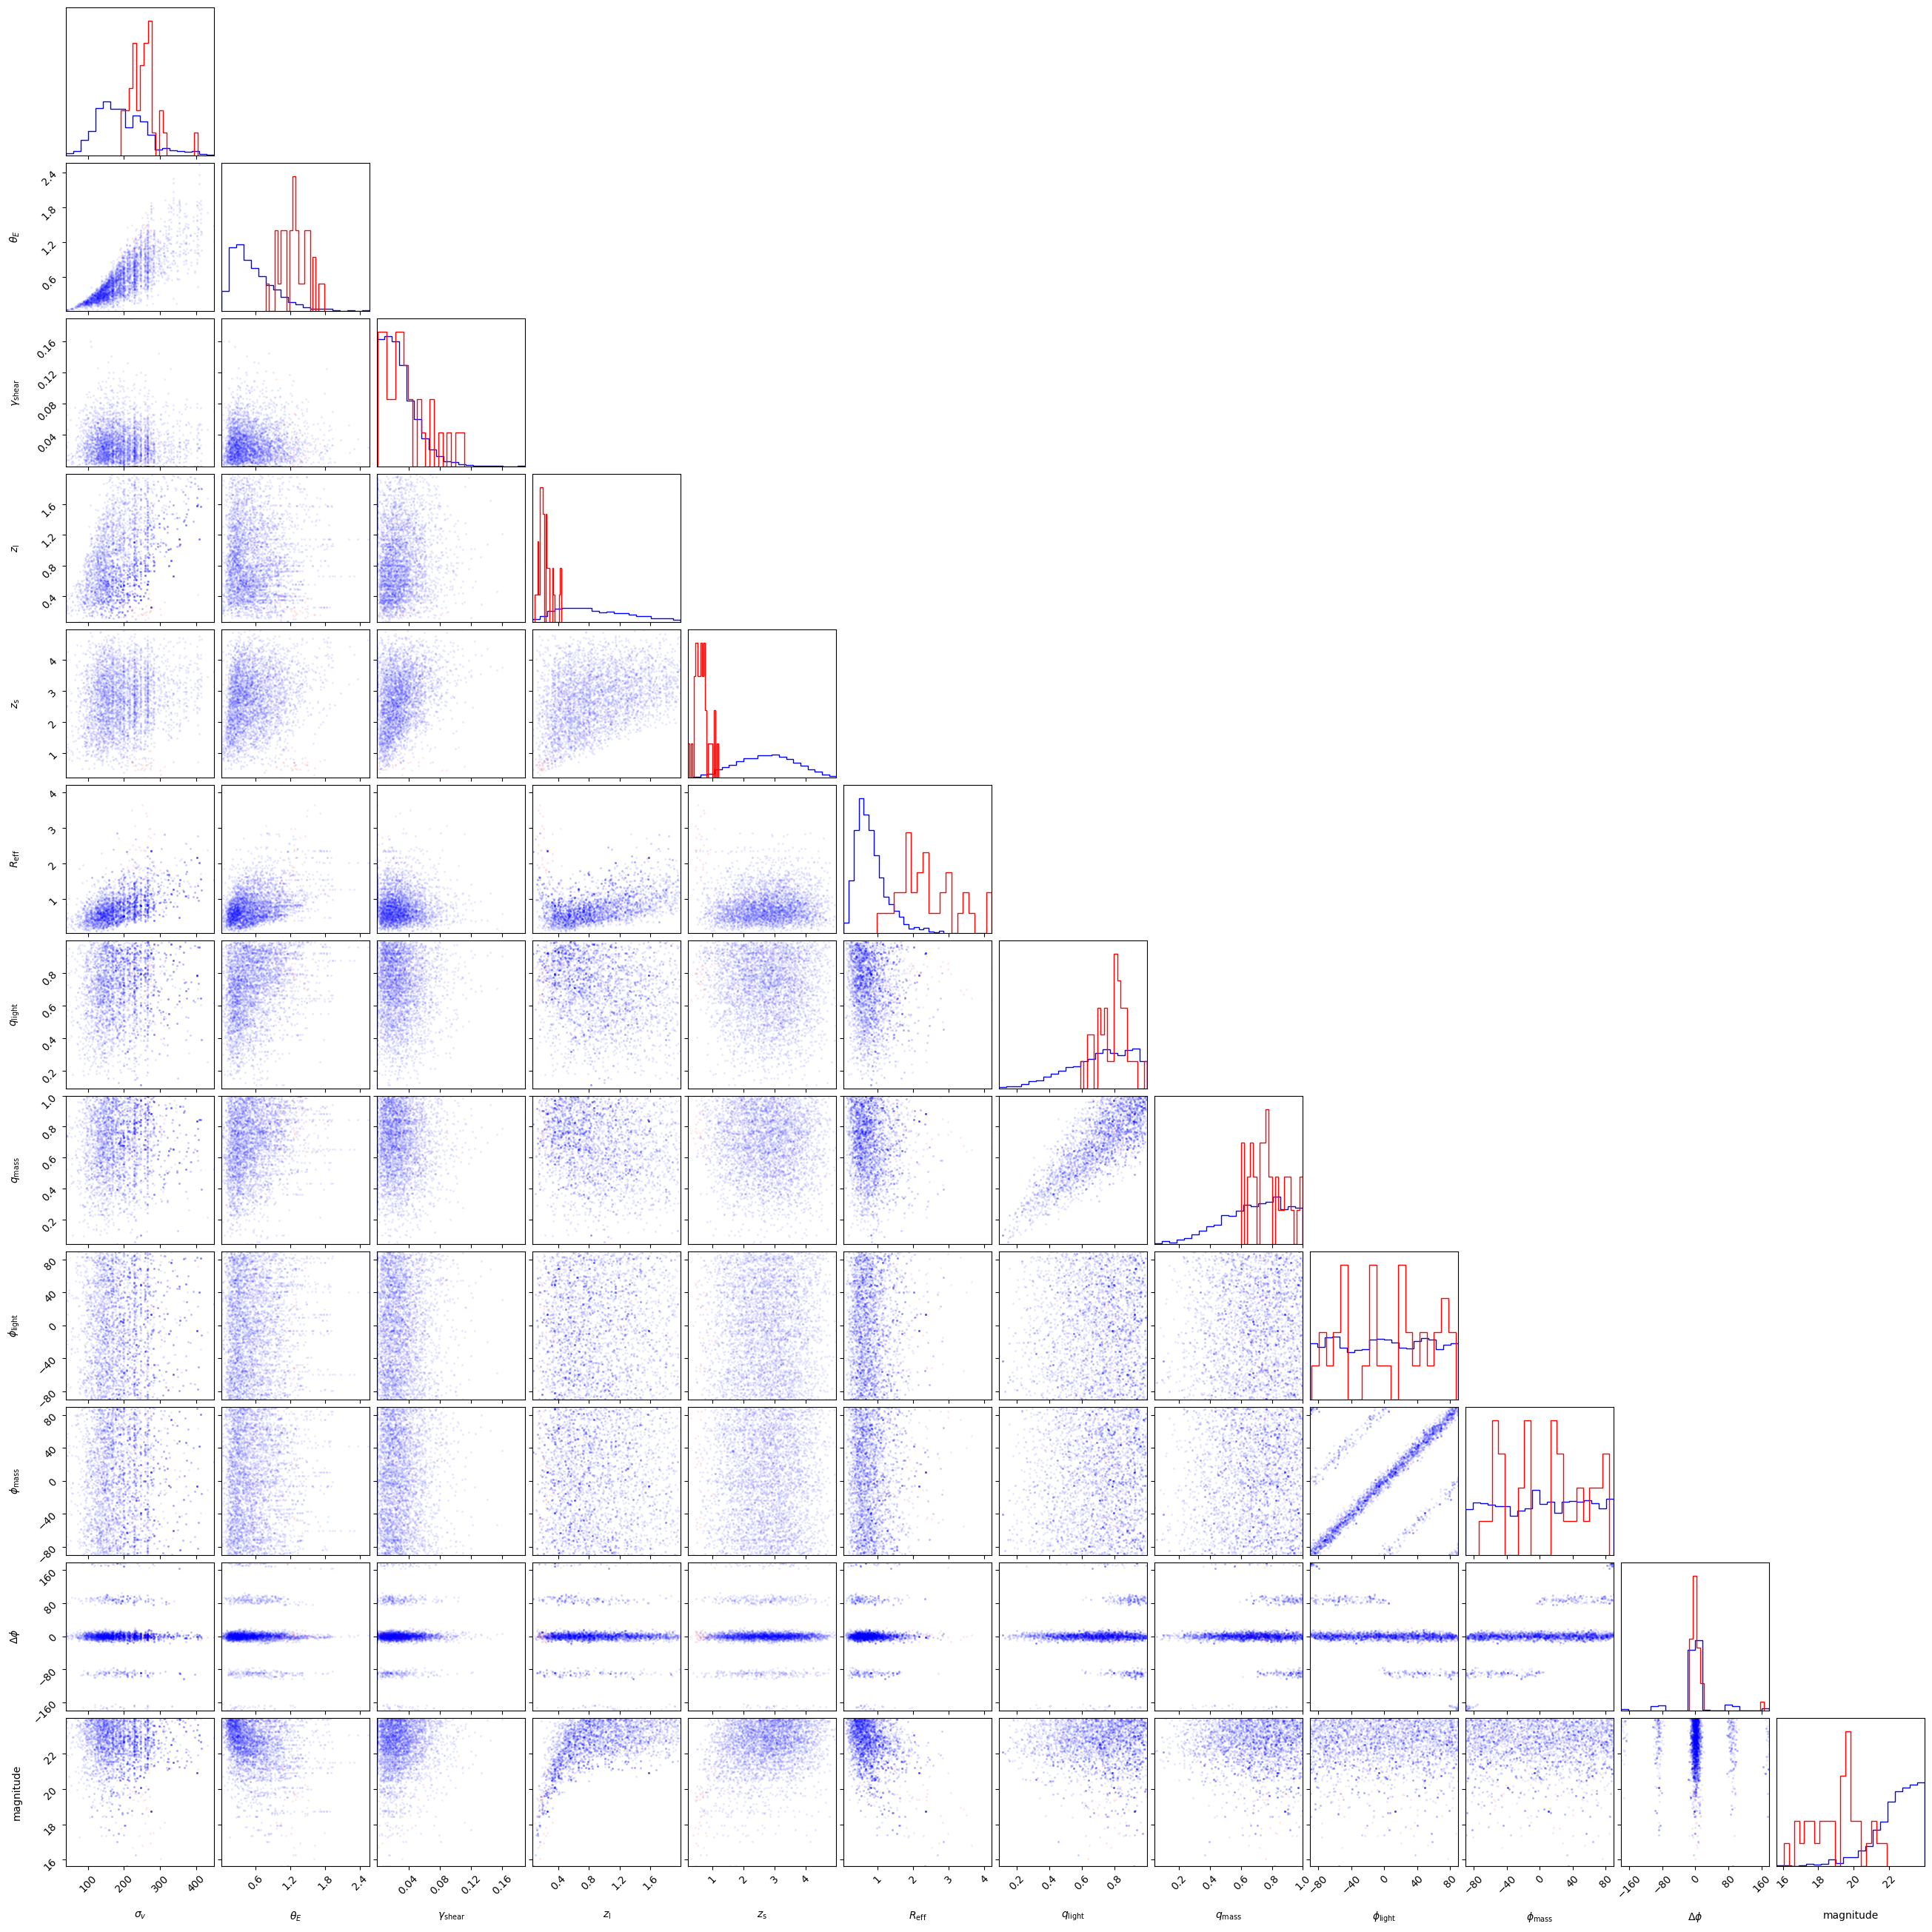

In [57]:
import matplotlib.pyplot as plt
import corner
import numpy as np

# Convert to arrays if not already
lens_samples_full = np.array(lens_samples_full, dtype=float)
dinos1_samples = np.array(dinos1_samples, dtype=float)

# Filter out rows with any NaNs
lens_samples_full = lens_samples_full[~np.isnan(lens_samples_full).any(axis=1)]
dinos1_samples = dinos1_samples[~np.isnan(dinos1_samples).any(axis=1)]

# Labels including magnitude
labels_with_mag = [
    r"$\sigma_v$",
    r"$\theta_E$",
    r"$\gamma_{\rm shear}$",
    r"$z_{\rm l}$",
    r"$z_{\rm s}$",
    r"$R_{\rm eff}$",
    r"$q_{\rm light}$",
    r"$q_{\rm mass}$",
    r"$\phi_{\rm light}$",
    r"$\phi_{\rm mass}$",
    r"$\Delta \phi$",
    "magnitude",
]

# Step 1: Plot lens_samples_full (simulated)
fig = None
fig = corner.corner(
    lens_samples_full,
    labels=labels_with_mag,
    color="blue",
    plot_datapoints=True,
    plot_density=False,
    fill_contours=False,
    plot_contours=False,
    hist_kwargs={"density": True},
    scatter_kwargs={"s": 10, "alpha": 0.5},
)

# Step 2: Overlay dinos1_samples (observed)
corner.corner(
    dinos1_samples,
    labels=labels_with_mag,
    color="red",
    fig=fig,
    plot_datapoints=True,
    plot_density=False,
    fill_contours=False,
    plot_contours=False,
    hist_kwargs={"density": True},
    scatter_kwargs={"s": 14, "alpha": 0.6},
)

# Step 3: Save and display
plt.savefig("sim_vs_slacs_with_magnitude_corner_plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [58]:
print("lens_samples_full shape:", lens_samples_full.shape)
print("dinos1_samples shape:", dinos1_samples.shape)

lens_samples_full shape: (3808, 12)
dinos1_samples shape: (34, 12)


## SLSim Vs. SLACS Dinos Lenses- 3D Scatter Plot (Mia LaMontagne) 

In this first plot the velocity dispersion, phsyical effective radius, and magnitude of the full SLACS Dinos dataset is compared to the SLSim dataset. 

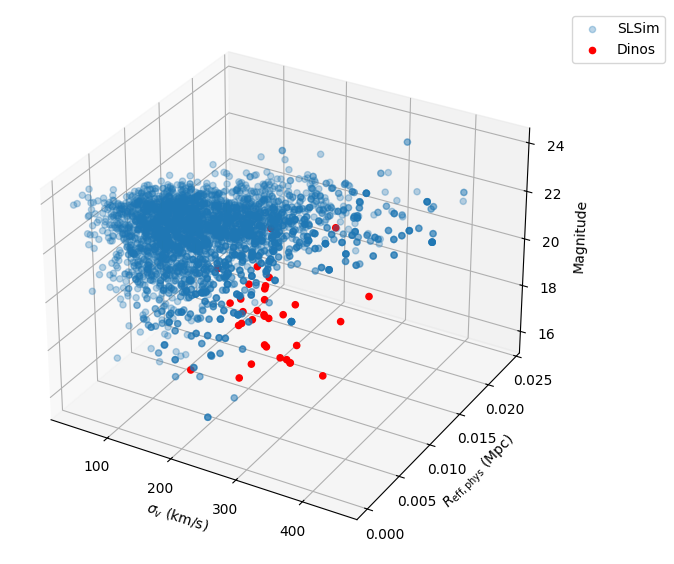

In [59]:
from mpl_toolkits.mplot3d import Axes3D


def arcsec2phys_lens(arcsec, z_lens):
    """
    Convert angular size [arcsec] at lens plane to physical size [Mpc].
    """
    θ_rad = (arcsec * u.arcsec).to(u.rad).value
    return θ_rad * cosmo.angular_diameter_distance(z_lens).to(u.Mpc).value


# Rebuild lens_samples_new from the lens_samples_full
z_lens_slsim = lens_samples_full[:, 3]
r_arc_slsim = lens_samples_full[:, 5]
r_phys_slsim = arcsec2phys_lens(r_arc_slsim, z_lens_slsim).reshape(-1, 1)

lens_samples_new = np.hstack([lens_samples_full, r_phys_slsim])

# Rebuild dinos1_samples_full from the dinos1_samples
z_lens_dinos = dinos1_samples[:, 3]
r_arc_dinos = dinos1_samples[:, 5]
r_phys_dinos = arcsec2phys_lens(r_arc_dinos, z_lens_dinos).reshape(-1, 1)

dinos1_samples_new = np.hstack([dinos1_samples, r_phys_dinos])

labels = labels_with_mag + [r"$R_{\rm eff, phys}$"]

# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot SLSim
ax.scatter(
    lens_samples_new[:, 0],  # sigma_v
    lens_samples_new[:, 12],  # physical R_eff
    lens_samples_new[:, 11],  # magnitude
    label="SLSim",
    alpha=0.3,
    s=20,
)

# Plot Dinos
ax.scatter(
    dinos1_samples_new[:, 0],  # sigma_v
    dinos1_samples_new[:, 12],  # physical R_eff
    dinos1_samples_new[:, 11],  # magnitude
    color="red",
    label="Dinos",
    alpha=1,
    s=20,
)
ax.set_xlabel(r"$\sigma_v$ (km/s)")
ax.set_ylabel(r"$R_{\rm eff, phys}$ (Mpc)")
ax.set_zlabel("Magnitude")
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))


fig.tight_layout(pad=2.0)

fig.subplots_adjust(right=0.82)

plt.show()

In [60]:
# check that sizes match
print("SLSim shape:", lens_samples_new.shape)
print("Dinos shape:", dinos1_samples_new.shape)

SLSim shape: (3808, 13)
Dinos shape: (34, 13)


This same plot is then visualized in an interactive way to enable easier comparison of the two datasets correlations.

In [61]:
import os
import plotly.express as px
from IPython.display import IFrame, display


if "lens_samples_new" in globals() and "dinos1_samples_new" in globals():
    # Prepare DataFrame
    df_slsim = pd.DataFrame(
        {
            "sigma_v": lens_samples_new[:, 0],
            "R_eff_phys": lens_samples_new[:, 12],
            "Magnitude": lens_samples_new[:, 11],
            "Dataset": "SLSim",
        }
    )
    df_dinos = pd.DataFrame(
        {
            "sigma_v": dinos1_samples_new[:, 0],
            "R_eff_phys": dinos1_samples_new[:, 12],
            "Magnitude": dinos1_samples_new[:, 11],
            "Dataset": "Dinos",
        }
    )
    df = pd.concat([df_slsim, df_dinos], ignore_index=True)

    # Create plot
    fig = px.scatter_3d(
        df,
        x="sigma_v",
        y="R_eff_phys",
        z="Magnitude",
        color="Dataset",
        opacity=0.7,
        title="Interactive 3D Scatter: σᵥ vs R_eff_phys vs Magnitude",
        labels={
            "sigma_v": "σᵥ (km/s)",
            "R_eff_phys": "R_eff_phys (Mpc)",
            "Magnitude": "Magnitude",
        },
    )

    # Save as HTML
    html_path = "interactive_plot.html"
    fig.write_html(html_path, include_plotlyjs="cdn")

    # Display
    display(IFrame(src=html_path, width=800, height=600))
    print(f"Interactive plot saved to: {html_path}")

Interactive plot saved to: interactive_plot.html


In this next plot we compare the lens redshift, phsyical effective radius, and magnitude of the full SLACS Dinos dataset and the SLSim dataset. 

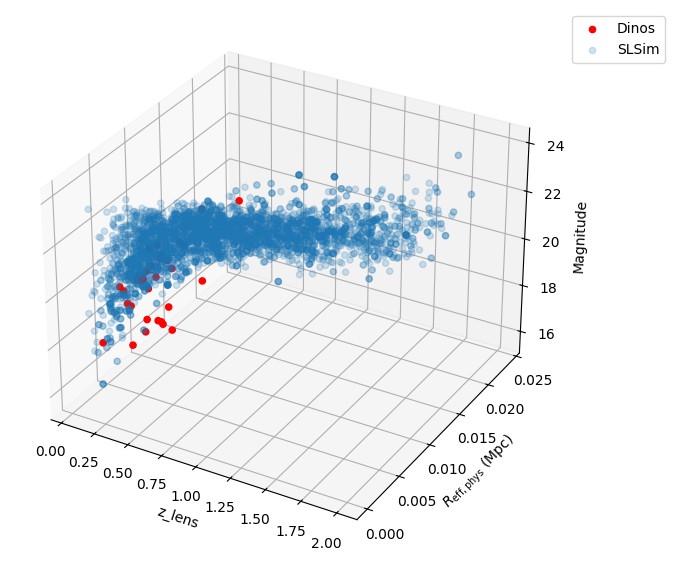

In [62]:
# Plotting with redshift instead of sigma_v

# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")


# Plot Dinos
ax.scatter(
    dinos1_samples_new[:, 3],  # z_lens
    dinos1_samples_new[:, 12],  # physical R_eff
    dinos1_samples_new[:, 11],  # magnitude
    color="red",
    label="Dinos",
    alpha=1,
    s=20,
)


# Plot SLSim
ax.scatter(
    lens_samples_new[:, 3],  # z_lens
    lens_samples_new[:, 12],  # physical R_eff
    lens_samples_new[:, 11],  # magnitude
    label="SLSim",
    alpha=0.2,
    s=20,
)


ax.set_xlabel("z_lens")
ax.set_ylabel(r"$R_{\rm eff, phys}$ (Mpc)")
ax.set_zlabel("Magnitude")
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))


fig.tight_layout(pad=2.0)
fig.subplots_adjust(right=0.82)

plt.show()

Again, we make this plot interactive. 

In [63]:
import os
import plotly.express as px
from IPython.display import IFrame, display


if "lens_samples_new" in globals() and "dinos1_samples_new" in globals():
    # Prepare DataFrame
    df_slsim = pd.DataFrame(
        {
            "z_lens": lens_samples_new[:, 3],
            "R_eff_phys": lens_samples_new[:, 12],
            "Magnitude": lens_samples_new[:, 11],
            "Dataset": "SLSim",
        }
    )
    df_dinos = pd.DataFrame(
        {
            "z_lens": dinos1_samples_new[:, 3],
            "R_eff_phys": dinos1_samples_new[:, 12],
            "Magnitude": dinos1_samples_new[:, 11],
            "Dataset": "Dinos",
        }
    )
    df = pd.concat([df_slsim, df_dinos], ignore_index=True)

    # Create plot
    fig = px.scatter_3d(
        df,
        x="z_lens",
        y="R_eff_phys",
        z="Magnitude",
        color="Dataset",
        opacity=0.7,
        title="Interactive 3D Scatter: z_lens vs R_eff_phys vs Magnitude",
        labels={
            "z_lens": "z_lens",
            "R_eff_phys": "R_eff_phys (Mpc)",
            "Magnitude": "Magnitude",
        },
    )

    # Save as HTML
    html_path = "interactive_plot.html"
    fig.write_html(html_path, include_plotlyjs="cdn")

    # Display plot
    display(IFrame(src=html_path, width=800, height=600))
    print(f"Interactive plot saved to: {html_path}")

Interactive plot saved to: interactive_plot.html


In this section, we condition the SLSim dataset and SLACS Dinos dataset to match in lens redshift range for more accurate comparisons. We then generate two 3D plots: the first compares velocity dispersion, phsycial effective radius, and magnitude and the second compares lens redshift, physical effective radius, and magnitude. 

In [64]:
# Extract SLACS redshift range
print("Dinos1 z_lens:", slacs_data["z_lens"].min(), "-", slacs_data["z_lens"].max())

Dinos1 z_lens: 0.09 - 0.78


In [65]:
# Condition SLACS and SLSim to be within the same redhsift range
z_lens_min, z_lens_max = slacs_data["z_lens"].min(), slacs_data["z_lens"].max()

mask = (lens_samples_new[:, 3] >= z_lens_min) & (lens_samples_new[:, 3] <= z_lens_max)
SLSim_filtered = lens_samples_new[mask]

print(f"Total SLSim systems:    {lens_samples_new.shape[0]}")
print(f"Filtered SlSim systems: {SLSim_filtered.shape[0]}")

Total SLSim systems:    3808
Filtered SlSim systems: 1811


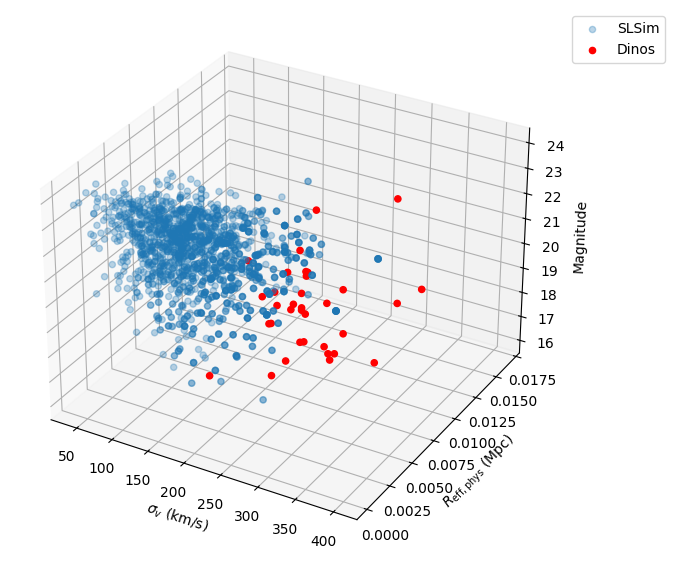

In [72]:
# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot SLSim
ax.scatter(
    SLSim_filtered[:, 0],  # sigma_v
    SLSim_filtered[:, 12],  # physical R_eff
    SLSim_filtered[:, 11],  # magnitude
    label="SLSim",
    alpha=0.3,
    s=20,
)

# Plot Dinos
ax.scatter(
    dinos1_samples_new[:, 0],  # sigma_v
    dinos1_samples_new[:, 12],  # physical R_eff
    dinos1_samples_new[:, 11],  # magnitude
    color="red",
    label="Dinos",
    alpha=1,
    s=20,
)
ax.set_xlabel(r"$\sigma_v$ (km/s)")
ax.set_ylabel(r"$R_{\rm eff, phys}$ (Mpc)")
ax.set_zlabel("Magnitude")
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))


fig.tight_layout(pad=2.0)

fig.subplots_adjust(right=0.82)

plt.show()

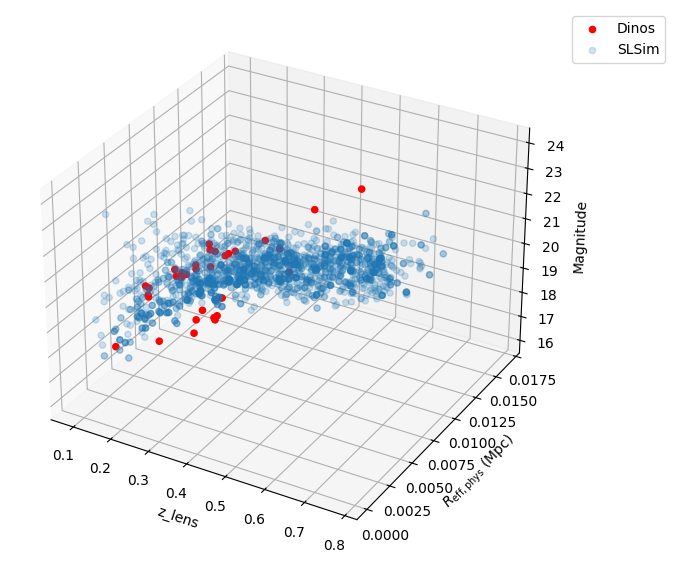

In [73]:
# Plotting with redshift

# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")


# Plot Dinos
ax.scatter(
    dinos1_samples_new[:, 3],  # z_lens
    dinos1_samples_new[:, 12],  # physical R_eff
    dinos1_samples_new[:, 11],  # magnitude
    color="red",
    label="Dinos",
    alpha=1,
    s=20,
)


# Plot SLSim
ax.scatter(
    SLSim_filtered[:, 3],  # z_lens
    SLSim_filtered[:, 12],  # physical R_eff
    SLSim_filtered[:, 11],  # magnitude
    label="SLSim",
    alpha=0.2,
    s=20,
)


ax.set_xlabel("z_lens")
ax.set_ylabel(r"$R_{\rm eff, phys}$ (Mpc)")
ax.set_zlabel("Magnitude")
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))


fig.tight_layout(pad=2.0)
fig.subplots_adjust(right=0.82)

plt.show()

In this final section, we compute and visualize the bolometric brightness of the SLSim and SLACS Dinos lenses by converting their apparent magnitudes into bolometric magnitudes. 

In [74]:
import numpy as np

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

z_lens_Dinos = dinos1_samples_new[:, 3]
z_lens_SLSim = SLSim_filtered[:, 3]

# Compute d_L
d_lens_Dinos = cosmo.luminosity_distance(z_lens_Dinos)
d_lens_SLSim = cosmo.luminosity_distance(z_lens_SLSim)

# Get L
L_lens_Dinos = dinos1_samples_new[:, 11]
L_lens_SLSim = SLSim_filtered[:, 11]

# Compute the distance modulus= 5 log10(d_L/pc) – 5
mu_Dinos = 5 * np.log10(d_lens_Dinos.to(u.pc).value) - 5
mu_SLSim = 5 * np.log10(d_lens_SLSim.to(u.pc).value) - 5

L_sun = 3.828e33

# Absolute bolometric mag
M_bol_Dinos = 4.74 - 2.5 * np.log10(L_lens_Dinos / L_sun)
M_bol_SLSim = 4.74 - 2.5 * np.log10(L_lens_SLSim / L_sun)

# Apparent bolometric mag
m_bol_Dinos = M_bol_Dinos + mu_Dinos
m_bol_SLSim = M_bol_SLSim + mu_SLSim


# Aappend to array

m_bol_Dinos_col = m_bol_Dinos.reshape(-1, 1)
m_bol_SLSim_col = m_bol_SLSim.reshape(-1, 1)

dinos_samples_with_bol = np.hstack([dinos1_samples_new, m_bol_Dinos_col])

slsim_samples_with_bol = np.hstack([SLSim_filtered, m_bol_SLSim_col])

labels_with_bolo = labels + [r"$m_{\rm bol}$"]

# Check that sizes match
print("SLSim shape:", slsim_samples_with_bol.shape)
print("Dinos shape:", dinos_samples_with_bol.shape)

SLSim shape: (1811, 14)
Dinos shape: (34, 14)


This plot compares the velocity disperison, physical effective radius, and bolometric brightness of the two datasets. 

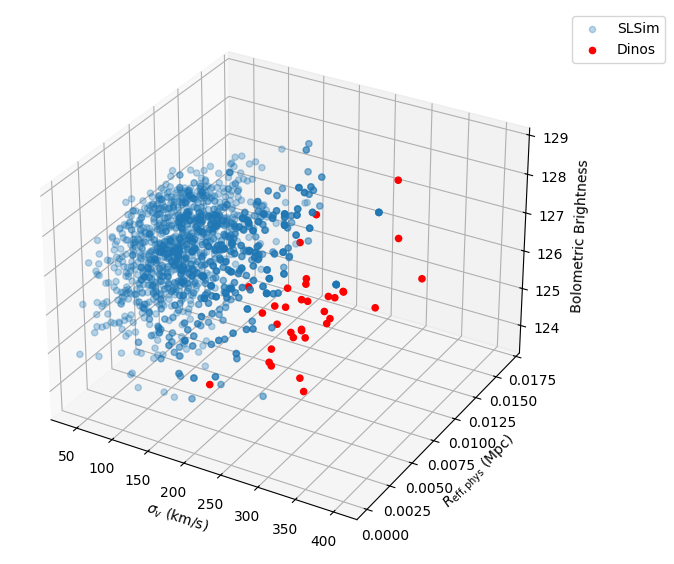

In [75]:
# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot SLSim
ax.scatter(
    slsim_samples_with_bol[:, 0],  # sigma_v
    slsim_samples_with_bol[:, 12],  # physical R_eff
    slsim_samples_with_bol[:, 13],  # bolometric mag
    label="SLSim",
    alpha=0.3,
    s=20,
)

# Plot Dinos
ax.scatter(
    dinos_samples_with_bol[:, 0],  # sigma_v
    dinos_samples_with_bol[:, 12],  # physical R_eff
    dinos_samples_with_bol[:, 13],  # bolometric mag
    color="red",
    label="Dinos",
    alpha=1,
    s=20,
)
ax.set_xlabel(r"$\sigma_v$ (km/s)")
ax.set_ylabel(r"$R_{\rm eff, phys}$ (Mpc)")
ax.set_zlabel("Bolometric Brightness")
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))


fig.tight_layout(pad=2.0)

fig.subplots_adjust(right=0.82)

plt.show()

This plot compares the lens redshift, physical effective radius, and bolometric brightness of the two datasets. 

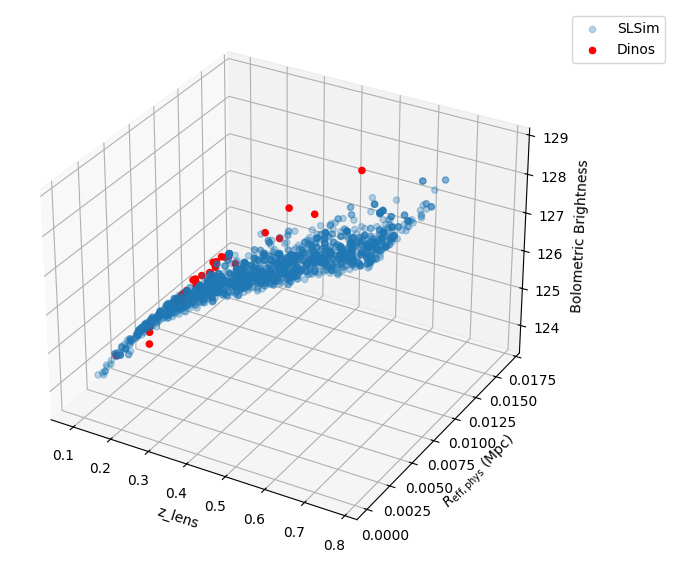

In [76]:
# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot SLSim
ax.scatter(
    slsim_samples_with_bol[:, 3],  # z_lens
    slsim_samples_with_bol[:, 12],  # physical R_eff
    slsim_samples_with_bol[:, 13],  # bolometric mag
    label="SLSim",
    alpha=0.3,
    s=20,
)

# Plot Dinos
ax.scatter(
    dinos_samples_with_bol[:, 3],  # z_lens
    dinos_samples_with_bol[:, 12],  # physical R_eff
    dinos_samples_with_bol[:, 13],  # bolometric mag
    color="red",
    label="Dinos",
    alpha=1,
    s=20,
)
ax.set_xlabel("z_lens")
ax.set_ylabel(r"$R_{\rm eff, phys}$ (Mpc)")
ax.set_zlabel("Bolometric Brightness")
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))


fig.tight_layout(pad=2.0)

fig.subplots_adjust(right=0.82)

plt.show()